# Bellabeat Wellness Company - Case Study
* Author: Jacob Wang
* Created: 5/1/2023
* Google Data Analytics Certificate 

## Business Task: 
Analyze smart device data to gain insight into how consumers are using their smart devices. Use data to see how Bellabeat could further
help members/improve their products. Present analysis to the Bellabeat
executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

Answer these questions: 
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

## Data Cleaning

In [12]:
## imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
# read in data
activity_df = pd.read_csv('dailyActivity_merged.csv')
sleep_df = pd.read_csv('sleepDay_merged.csv')
cals_df = pd.read_csv('dailyCalories_merged.csv')
intense_df = pd.read_csv('dailyIntensities_merged.csv')

### Data Description
Data consists of user data from a wellness company. 33 members tracked their calories, activity, and sleep for one month. The results are going to be our topic of analysis. We will mainly use the .csv files that contain user activity and sleep data. 

In [14]:
# preview data
activity_df.info()
activity_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [15]:
a_df = activity_df.copy()

In [29]:
a_df['ActivityDate'] = a_df['ActivityDate'].astype('datetime64[ns]')

In [30]:
# check for number of unique Id (number of survey participants)
a_df['Id'].nunique()

33

In [31]:
# export cleaned df to excel file
a_df.to_excel("activity_df.xlsx")

In [32]:
sleep_df.info()
sleep_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [33]:
# check for duplicates
sleep_df.duplicated().sum()

3

In [34]:
# remove duplicates
sleep_df.drop_duplicates()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [35]:
s_df = sleep_df.copy()

In [36]:
# export cleaned df to excel file
s_df.to_excel("sleep_df.xlsx")

No missing values, some duplicates in the 'sleep' dataset were removed. Converted date columns into datetime dtype.

In [37]:
# combine main areas of interest into one dataframe
combined = pd.merge(a_df, s_df, on = 'Id')
combined.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/17/2016 12:00:00 AM,1,700,712


In [38]:
# check duplicates
combined.duplicated().sum()

93

In [39]:
# drop duplicates
combined = combined.drop_duplicates()

In [59]:
# recheck for dupes
combined.duplicated().sum()

0

In [40]:
# create column for day of week
combined["DayOfTheWeek"] = combined["ActivityDate"].dt.day_name()

## Analyze 

In [41]:
# summarize activity df
a_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


Summary: 
* Avg total steps: 7637 steps
* Avg very active mins: 21.16 mins
* Avg fairly active mins: 13.56 mins
* Avg lighly active mins: 192.81 mins
* Avg sedentary minutes: 991.21 mins
* Avg total calories burned: 2303.61 calories

The average total calories burned value seems quite reasonable. However, the total steps taken seems somewhat low. This could be due to a large number of users reporting 0 steps taken each day. This is impossible for most people and the data could be improved by removing these unlikely data points (outliers). 

As can be expected, the average number of very active or fairly active minutes is much less than the amount of lightly active minutes or sedentary minutes. Most people don't have the time or desire to commit to long, intense exercise sessions. 

The high number of sedentary minutes is somewhat concerning. It is likely that time spent asleep is factored into this calculation. This could be an area that Bellabeat improves on with their products: motivating members to increase their activity and spend less time sedentary. 




In [44]:
## view summary stats for sleep df
s_df.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


Average time spent asleep: 6.98 hours


## Visualize

/var/folders/9t/bmzypr2s7c5fdyrg9_5l57rw0000gn/T/ipykernel_7656/3365381654.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = combined.corr()
/var/folders/9t/bmzypr2s7c5fdyrg9_5l57rw0000gn/T/ipykernel_7656/3365381654.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


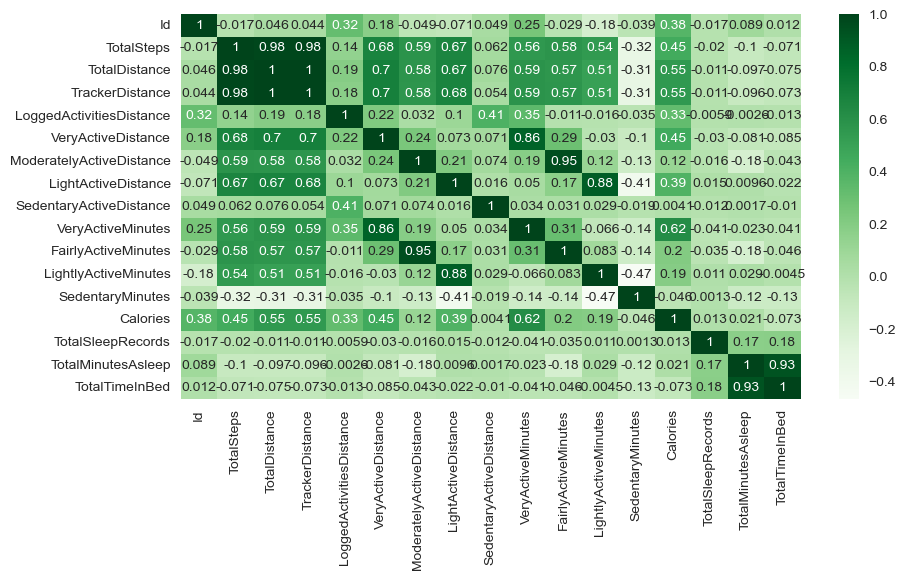

In [45]:
## calculate correlation between features # Visualize with heatmap
corr = combined.corr()
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap = 'Greens', annot = True);
plt.savefig('heatmap.png', dpi = 300);


By creating a correlation heatmap, we can quickly view the relationships between our features. Many of our features have strong correlations and calories can be considered our target variable. Calories typically increases as activity increases. 

/var/folders/9t/bmzypr2s7c5fdyrg9_5l57rw0000gn/T/ipykernel_7656/971457847.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


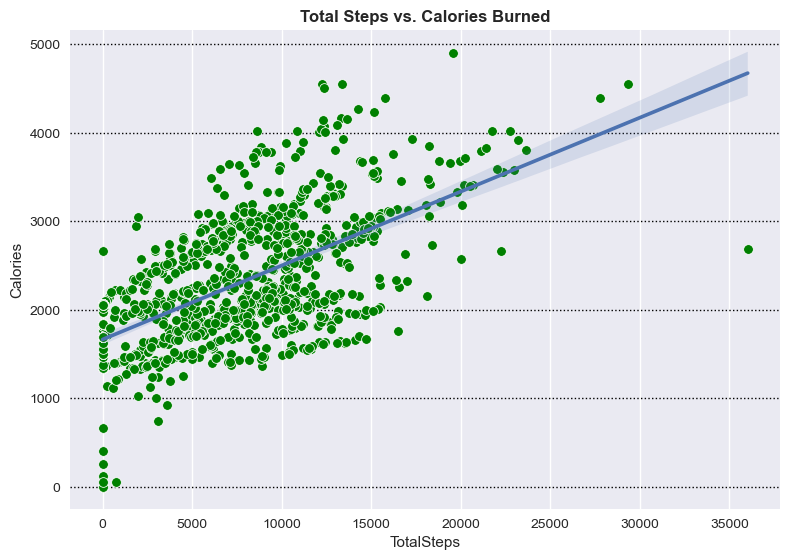

In [46]:
# create scatter plot
ax = sns.scatterplot(data = a_df, x = 'TotalSteps', y = 'Calories', color = 'Green');
plt.style.use('seaborn')
plt.grid(which= 'major',axis= 'y',color= 'k', ls=':')
sns.regplot(data=a_df, x="TotalSteps", y="Calories", scatter=False, ax=ax)
plt.tight_layout()
plt.savefig('steps_vs_calories.png', dpi=300)
plt.title('Total Steps vs. Calories Burned', fontweight = 'bold');

As could probably be expected, increasing total steps also typically increases total calories burned. This chart also illustrates another important aspect of the data. There are many data points with 0 total steps but with a high number of calories burned. This could be due to a number of factors, but is probably some type of error and is skewing the data significantly. 

/var/folders/9t/bmzypr2s7c5fdyrg9_5l57rw0000gn/T/ipykernel_7656/230211083.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


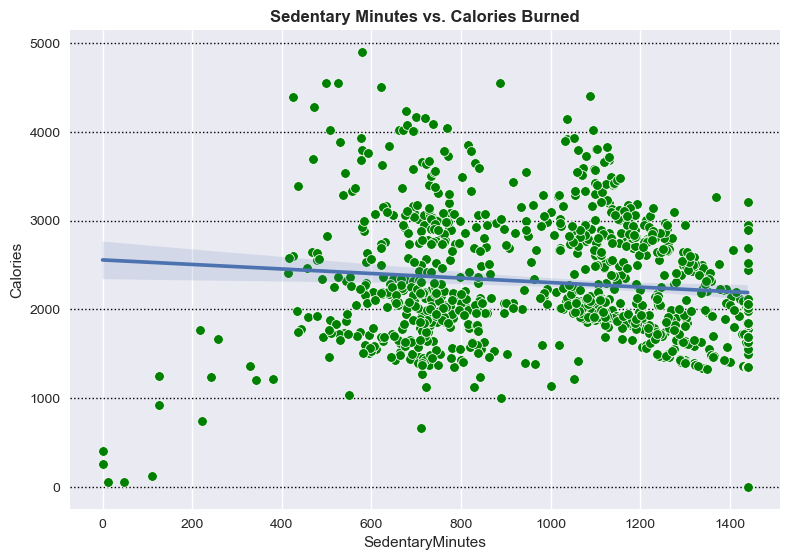

In [47]:
# create scatter plot
ax = sns.scatterplot(data = a_df, x = 'SedentaryMinutes', y = 'Calories', color = 'Green');
plt.style.use('seaborn')
plt.grid(which= 'major',axis= 'y',color= 'k', ls=':')
sns.regplot(data=a_df, x="SedentaryMinutes", y="Calories", scatter=False, ax=ax)
plt.tight_layout()
plt.savefig('sedentary_vs_calories.png', dpi=300)
plt.title('Sedentary Minutes vs. Calories Burned', fontweight = 'bold');

As users accumulate more sedentary time, their calories burned also tends to decrease slightly. Like the previous dataset, there are many outliers in this data that are skewing the data. Usually it is impossible for several people to either spend the whole day in a sedentary state, and likewise there is a small chance that these users also spend the entire day active. 

In addition, it is highly likely that sleep is factored into "sedentary" minutes. Removing sleep hours from sedentary time could reveal even more interesting insights. 

In [50]:
combined['DayOfTheWeek'].value_counts()

Tuesday      1997
Wednesday    1982
Thursday     1924
Friday       1625
Saturday     1610
Sunday       1605
Monday       1605
Name: DayOfTheWeek, dtype: int64

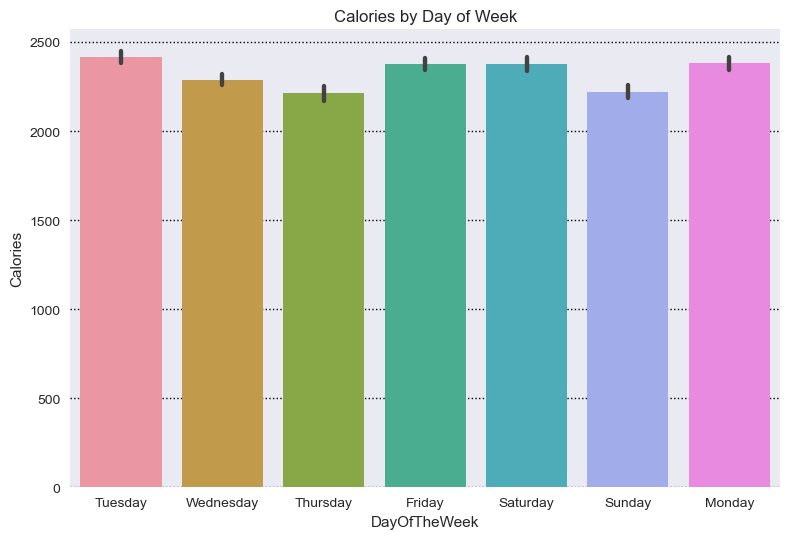

In [79]:
# plot bargraph for calories based on DotW
sns.barplot(data = combined, x = 'DayOfTheWeek', y = 'Calories')
plt.grid(which= 'major',axis= 'y',color= 'k', ls=':')
plt.title("Calories by Day of Week")
plt.tight_layout();

Based on our data, users typically burn the fewest calories on Thursday and Sunday. Bellabeat could make an effort to encourage a little extra exercise on Thursdays and Sundays through their app. 

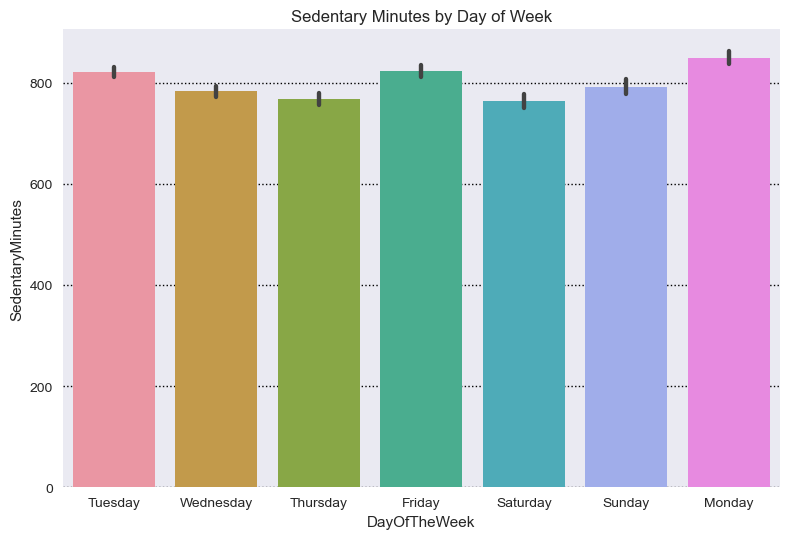

In [78]:
# plot bargraph for Sedentary mins based on DotW
sns.barplot(data = combined, x = 'DayOfTheWeek', y = 'SedentaryMinutes')
plt.grid(which= 'major',axis= 'y',color= 'k', ls=':')
plt.title("Sedentary Minutes by Day of Week")
plt.tight_layout();

Sedentary minutes are highest on Monday and Friday. Encouraging a little extra movement on these days through their app could improve health. 

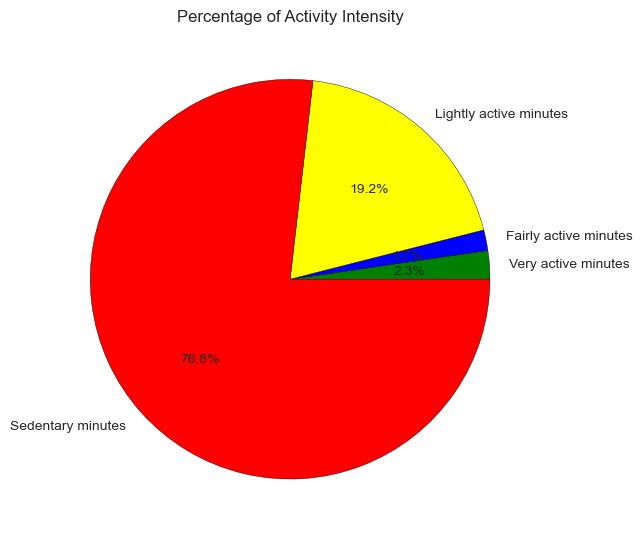

In [77]:
# calculating total of individual minutes column
very = combined["VeryActiveMinutes"].sum()
fairly = combined["FairlyActiveMinutes"].sum()
lightly = combined["LightlyActiveMinutes"].sum()
sedentary = combined["SedentaryMinutes"].sum()

# plotting pie chart
slices = [very, fairly, lightly, sedentary]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["Green", "Blue", "Yellow", "Red"]
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, autopct = "%1.1f%%")
plt.title("Percentage of Activity Intensity")
plt.tight_layout()
plt.show();

## Act 
Here are my high-level recommendations: 

Based on the data, the smart devices I will choose to focus on are the Bellabeat App and the Leaf activity tracker. 

1. Encourage members to increase total steps. Increasing total steps directly correlates with increased calories burned. This will lead to better overall health. 
2. A common trend I noticed was that some users tended not to track certain aspects of their activity on occasion. For instance, some users logged calories burned but with 0 steps taken. More consistent tracking will lead to better data and better health outcomes. 
3. After analyzing the activity habits of the members included in the data, it is clear that the majority of participants spend a significant amount of time in a sedentary state. 